In [48]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
import graphviz
from sklearn_pandas import DataFrameMapper
from sklearn import decomposition
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn2pmml.decoration import ContinuousDomain
from sklearn2pmml.pipeline import PMMLPipeline
from sklearn2pmml import sklearn2pmml
from six import StringIO
from IPython.display import Image 
from sklearn import tree
import sklearn.datasets as datasets
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import math
# Line to create Python enviroment
# conda create -n thing python=3.6 numpy=1.16.2 pandas=0.24.2 scipy=1.2.1 onnx=1.4.1 onnxruntime=0.3.0 skl2onnx=1.4.5
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn

In [49]:
data = pd.read_csv('data_public.csv.gz', compression='gzip', header=0, sep=',',quotechar='"')
print(data.head())

            A          B           C          D           E          F  \
0  231.420023 -12.210984  217.624839 -15.611916  140.047185  76.904999   
1  -38.019270 -14.195695    9.583547  22.293822  -25.578283 -18.373955   
2  -39.197085 -20.418850   21.023083  19.790280  -25.902587 -19.189004   
3  221.630408  -5.785352  216.725322  -9.900781  126.795177  85.122288   
4  228.558412 -12.447710  204.637218 -13.277704  138.930529  91.101870   

            G           H          I           J           K         L  \
0  131.591871  198.160805  82.873279  127.350084  224.592926 -5.992983   
1   -0.094457  -33.711852  -8.356041   23.792402    4.199023  2.809159   
2   -2.953836  -25.299219  -6.612401   26.285392    5.911292  6.191587   
3  108.857593  197.640135  82.560019  157.105143  212.989231 -3.621070   
4  115.598954  209.300011  89.961688  130.299732  201.795100 -1.573922   

           M           N           O  Class  
0 -14.689648  143.072058  153.439659      2  
1 -59.330681  -11.

In [50]:
print(data['Class'].value_counts())

2    599228
3    400780
1    199992
Name: Class, dtype: int64


In [51]:
data['Class'].unique()

array([2, 3, 1], dtype=int64)

In [52]:
data.shape

(1200000, 16)

In [53]:
data.isna().sum()

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
Class    0
dtype: int64

In [54]:
data.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'Class'],
      dtype='object')

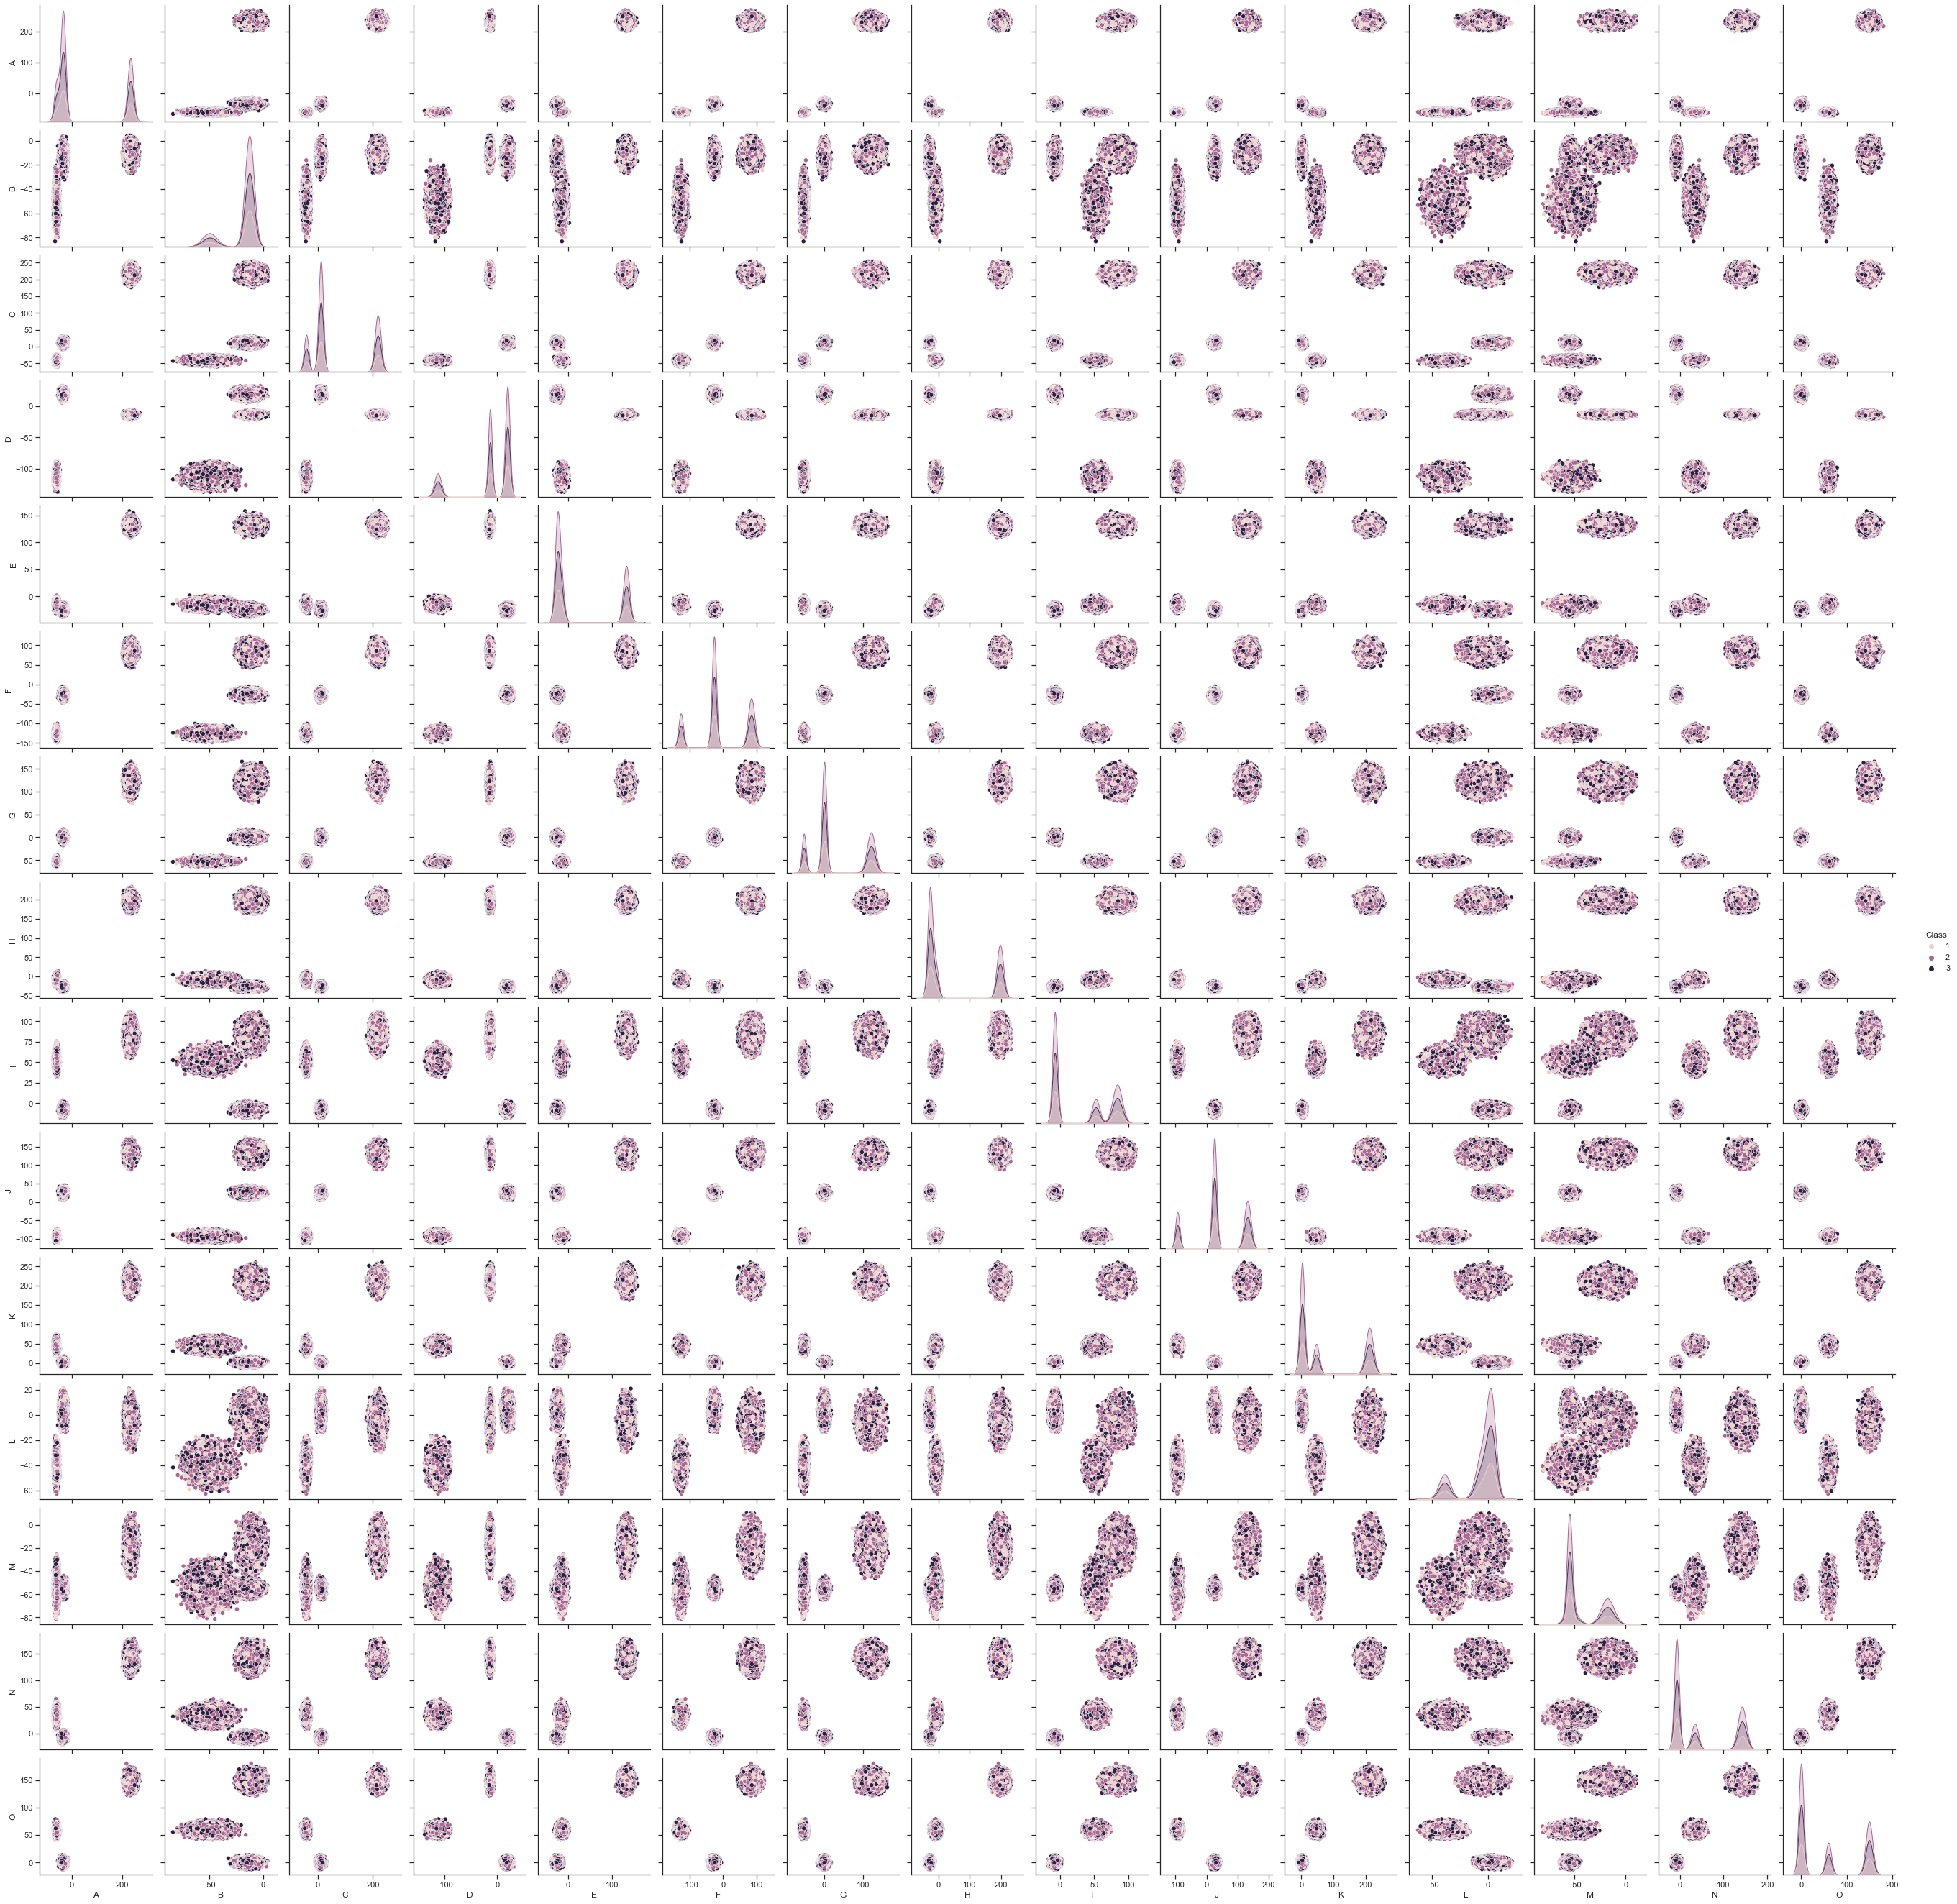

In [71]:
import seaborn as sns
sns.set_theme(style="ticks")


_=sns.pairplot(data, hue="Class")

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 16 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   A       1200000 non-null  float64
 1   B       1200000 non-null  float64
 2   C       1200000 non-null  float64
 3   D       1200000 non-null  float64
 4   E       1200000 non-null  float64
 5   F       1200000 non-null  float64
 6   G       1200000 non-null  float64
 7   H       1200000 non-null  float64
 8   I       1200000 non-null  float64
 9   J       1200000 non-null  float64
 10  K       1200000 non-null  float64
 11  L       1200000 non-null  float64
 12  M       1200000 non-null  float64
 13  N       1200000 non-null  float64
 14  O       1200000 non-null  float64
 15  Class   1200000 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 146.5 MB


In [56]:
labels = ['A', 'B','C','D','E','F','G','H','I','J','K','L','M','N','O']
# X = pd.DataFrame(data=data.drop('Class', axis=1), columns=labels)
# y = pd.DataFrame(data=data['Class'],columns=['Class'])
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['Class'],axis=1),
                                                    data['Class'],
                                                    test_size=0.3,
                                                   random_state = 0)
training_data = pd.concat([X_train,y_train],axis=1)
test_data = pd.concat([X_test, y_test],axis = 1)
# print(test_data.head())
print(training_data.head())
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

                A          B          C           D          E           F  \
228628 -29.296865  -8.334011  11.231264   16.529677 -23.324354  -29.206529   
120024 -29.324695 -19.148576   9.833725   15.245807 -31.130877  -32.424902   
928247 -27.900078 -12.123457  15.282576   21.530544 -22.612894  -29.115443   
585587 -35.359291 -11.942523  10.470781   17.613873 -21.499139  -29.977728   
266705 -59.833384 -44.383501 -44.955872 -105.638946 -13.302321 -126.459688   

                G          H          I           J          K          L  \
228628   2.294805 -27.970121  -7.892577   29.825136   5.437222   7.489507   
120024   0.161168 -33.198989  -1.130139   26.854534   5.273738   2.951089   
928247   4.652987 -24.633090  -5.959184   15.465341   0.283050   3.477300   
585587   4.246074 -22.728884  -7.191213   39.316188   0.010978   3.930849   
266705 -54.336743  -6.234810  50.010981 -104.439435  37.862666 -40.266771   

                M          N          O  Class  
228628 -53.250144 -

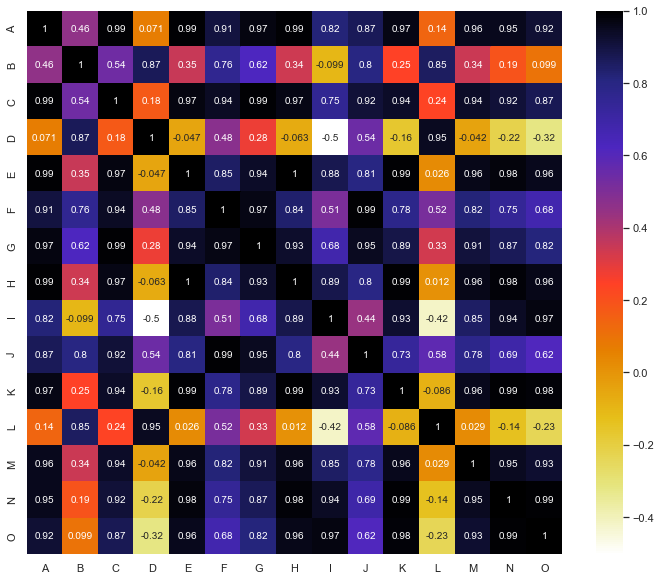

In [57]:
import seaborn as sns
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [69]:
X_train

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
228628,-29.296865,-8.334011,11.231264,16.529677,-23.324354,-29.206529,2.294805,-27.970121,-7.892577,29.825136,5.437222,7.489507,-53.250144,-10.158403,-2.193682
120024,-29.324695,-19.148576,9.833725,15.245807,-31.130877,-32.424902,0.161168,-33.198989,-1.130139,26.854534,5.273738,2.951089,-58.665061,-6.163087,-1.703490
928247,-27.900078,-12.123457,15.282576,21.530544,-22.612894,-29.115443,4.652987,-24.633090,-5.959184,15.465341,0.283050,3.477300,-51.804239,-4.854900,1.753080
585587,-35.359291,-11.942523,10.470781,17.613873,-21.499139,-29.977728,4.246074,-22.728884,-7.191213,39.316188,0.010978,3.930849,-52.477026,-2.181330,1.179113
266705,-59.833384,-44.383501,-44.955872,-105.638946,-13.302321,-126.459688,-54.336743,-6.234810,50.010981,-104.439435,37.862666,-40.266771,-44.650980,28.882249,67.550324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,-28.767302,-12.385724,13.348096,18.285803,-27.820761,-21.519221,11.198027,-24.074608,-6.813451,29.177895,4.596678,3.849517,-54.383468,-6.510443,-2.692177
152315,-42.842807,-9.278800,12.047941,23.952759,-24.455113,-24.686012,8.443709,-19.946118,-8.910962,23.663383,3.665795,-1.309687,-57.263094,-5.964941,7.517197
963395,224.849920,-12.097746,213.072749,-14.994080,132.386019,83.376648,123.739715,194.646152,86.175600,128.358937,205.600923,-1.453962,-22.666055,142.233042,144.676765
117952,-33.987576,-9.668888,8.769026,17.273842,-19.325383,-22.397276,0.939605,-23.760188,-4.511829,21.082648,2.055006,5.959613,-57.287954,-5.268342,3.279114


In [70]:
from imblearn.over_sampling import SMOTE

oversample=SMOTE(random_state=0)
X_os,y_os=oversample.fit_resample(X_train,y_train)

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=1),
                        LogisticRegression(random_state=1, solver='lbfgs'))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.498


In [64]:
from sklearn.ensemble import RandomForestClassifier
import indices
to_keep2 = ['A','B','D','F','I','L']
pipeline2 = PMMLPipeline([
 ('mapper',
 DataFrameMapper([
 (X_train[to_keep2].columns,
 [StandardScaler()])])),
 ('pca',
  PCA(n_components=1)),
 ('classifier',
 RandomForestClassifier(max_depth=2,n_estimators=10))
])
pipeline2.fit(training_data,#.drop('Class',axis=1),
 training_data['Class'])
results = pipeline2.predict(X_test)
actual = np.concatenate(y_test.values,np.array(y_test.values)[indices.astype(int)])
print('Accuracy:',metrics.accuracy_score(actual, results))


NameError: name 'indices' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(data.drop(labels=['Class'],axis=1),
                                                    data['Class'])  
#Fitting the data to model
model.fit(X_rfe,data['Class'])
print(rfe.support_)
print(rfe.ranking_)



In [ ]:
#no of features
nof_list=np.arange(1,15)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['Class'],axis=1),
                                                    data['Class'], test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n],step=1)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.95)
len(set(corr_features))

In [ ]:
corr_features

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

In [ ]:
sc = StandardScaler()
df_scaled = sc.fit_transform(data.drop('Class', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=labels)
print(df_scaled.columns)


pca_test = decomposition.PCA(n_components=15)
pca_test.fit(df_scaled)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

pca_test.explained_variance_ratio_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model1 = DecisionTreeClassifier(max_depth = 5, random_state=0)
model1.fit(X_train.drop(corr_features,axis=1), training_data['Class'])
results = model1.predict(X_test.drop(corr_features,axis=1))
actual = np.concatenate(y_test.values)
print('Accuracy:', metrics.accuracy_score(actual, results))

In [59]:
# X = pd.DataFrame(data=data.drop('Class', axis=1), columns=labels)
# y = pd.DataFrame(data=data['Class'],columns=['Class'])
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
# training_data = pd.concat([X_train,y_train],axis=1)

pipeline1 = PMMLPipeline([('pca',PCA(n_components=1)),
                          ('classifier',DecisionTreeClassifier(max_depth = 5))])
pipeline1.fit(X_train.drop(corr_features,axis=1),
         training_data['Class'])
results = pipeline1.predict(X_test.drop(corr_features,axis=1))
actual = np.concatenate(y_test.values)
print('Accuracy:', metrics.accuracy_score(actual, results))

ValueError: zero-dimensional arrays cannot be concatenated

In [65]:
from sklearn import metrics
features = 'ABDFIL'
for i in range(0, len(features)):
    pipeline = PMMLPipeline([('mapper',DataFrameMapper([(X_train.columns.drop([features[i:i+1]]).values,[StandardScaler()])])),
                             ('pca',PCA(n_components=1)),('classifier',DecisionTreeClassifier(max_depth = 3))])
    pipeline.fit(training_data.drop([features[i:i+1]], axis=1),training_data['Class'])
    results = pipeline.predict(X_test)
    actual = np.concatenate(y_test.values)
    print("Dropped feature:", features[i:i+1], ", Accuracy:", metrics.accuracy_score(actual, results))

ValueError: zero-dimensional arrays cannot be concatenated

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['Class'],axis=1), 
                                                    data['Class'],test_size=0.3,
                                                   random_state = 0)
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
print(mutual_info)

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info_index = X_train.columns
print(mutual_info.sort_values(ascending = False))

In [ ]:
mutual_info.sort_values(ascending = False).plot.bar(figsize = (10,10))

In [ ]:
X = pd.DataFrame(data=data.drop('Class', axis=1), columns=labels)
y = pd.DataFrame(data=data['Class'],columns=['Class'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
training_data = pd.concat([X_train,y_train],axis=1)
training_data.head()

In [66]:
from sklearn import metrics
features = 'DFIJKMN'
for i in range(0, len(features)):
    pipeline = PMMLPipeline([('mapper',DataFrameMapper([(X_train.columns.drop([features[i:i+1]]).values,[StandardScaler()])])),
                             ('pca',PCA(n_components=1)),('classifier',DecisionTreeClassifier(max_depth = 3))])
    pipeline.fit(training_data.drop([features[i:i+1]], axis=1),training_data['Class'])
    results = pipeline.predict(X_test)
    actual = np.concatenate(y_test.values)
    print("Dropped feature:", features[i:i+1], ", Accuracy:", metrics.accuracy_score(actual, results))

ValueError: zero-dimensional arrays cannot be concatenated

In [ ]:
data.corr('pearson')

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# to_keep1 = ['F','C','A','B','L','D','I','K','M','O']
# to_drop = ['A','B','C','E','G','H','L','O']
# to_keep = ['D', 'F', 'I', 'J', 'K', 'M','N']

# X_train_new = X_train[to_keep]
# X_test_new = X_test[to_keep]
# X_train.drop(corr_features, axis=1)
# X_test.drop(corr_features, axis=1)
# pipeline1 = PMMLPipeline([('pca',PCA(n_components=1)),
#                           ('classifier',RandomForestClassifier(max_depth=5,n_estimators=25))])
# pipeline1.fit(X_train_new,
#          training_data['Class'])
# results = model1.predict(X_test_new)
# actual = np.concatenate(y_test.values)
# print('Accuracy:', metrics.accuracy_score(actual, results))

In [ ]:
fig1 = plt.figure()
for i in range(1,16):
    fig1.add_subplot(4,4,i)
    plt.hist(data[features[i-1:i]], bins=20)
    plt.title(features[i-1:i])
fig1.add_subplot(4,4,16)
plt.hist(data['Class'], bins=20)
plt.title('Class')
fig1.subplots_adjust(hspace=1, wspace=1)
fig1.set_figheight(9)
fig1.set_figwidth(9)

In [ ]:
from feature_selector import FeatureSelector
fs = FeatureSelector(data = training_data.drop('Class',axis=1), labels =training_data['Class'] )
fs.identify_collinear(correlation_threshold = 0.98)